# Logistic Regression

## Introduction

Logistic regression is a type of linear regression used for classifying items into two groups. It works by predicting the chance of an event happening.

This model is a specialized form of linear regression. Unlike linear regression which produces a continuous range of values, logistic regression outputs categorical, often binary, results.

The dependent variables in logistic regression are categorical, and their relationship with independent variables might not always follow a linear pattern. Nonetheless, logistic regression is simple to implement and effective 

### Sigmoid Function

Instead of fitting a straight line or hyperplane, the logistic regression uses a sigmoid link function.

The sigmoid function can be defined as:
$$\sigma(z)=\frac{1}{1+e^{-z}}$$
The sigmoid function is an "S"-shaped curve, and takes any real-valued number and map it into a value between 0 and 1.
<img src="Image/sigmoid.png" alt="Drawing" style="width: 500px;"/>

Notably, z is a linear regression model, that
$$z=w^{T}X= \sum_{i=1}^{p}w_i x_i + b$$
where p is the number of predictors and b is the bias of the model.
And thus, 
$$\sigma(z)=\sigma(\sum_{i=1}^{p}w_i x_i + b)=\frac{1}{1+e^{-(\sum_{i=1}^{p}w_i x_i + b)}}$$

For simple linear regrssion ($p=2$), 
$$z=w_1x_1+w_2x_2+b$$
$$\sigma(z)=\sigma(w_1x_1+w_2x_2+b)=\frac{1}{1+e^{-(w_1x_1+w_2x_2+b)}}$$

This notebook utilizes the above simple model.

---

## Implementation

This notebook utilizes the Pima Indians Diabetes Dataset for logistic regression implementation.

#### Objective

The goal is to estimate the likelihood of developing diabetes within five years based on the data available on the Pima Indians.

#### Pima Indians Diabetes Dataset

The [Pima Indians Diabetes Dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) is rich dataset with individuals medical histories. The data has 768 observations with 9 variables. 


#### Tools

The notebook utilize the following libraries:

* [pandas](http://pandas.pydata.org)
* [numpy](https://numpy.org/doc/stable/index.html)
* [seaborn](https://seaborn.pydata.org/)
* [matplotlib](http://metplotlib.org)
    - Set the backend of matplotlib to the 'inline' backend ([learn more](https://ipython.readthedocs.io/en/stable/interactive/plotting.html))



In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Set the backend of matplotlib to the 'inline' backend
%matplotlib inline 

#### Define Sigmoid Function

Text(0.5, 1.0, 'Sigmoid Function')

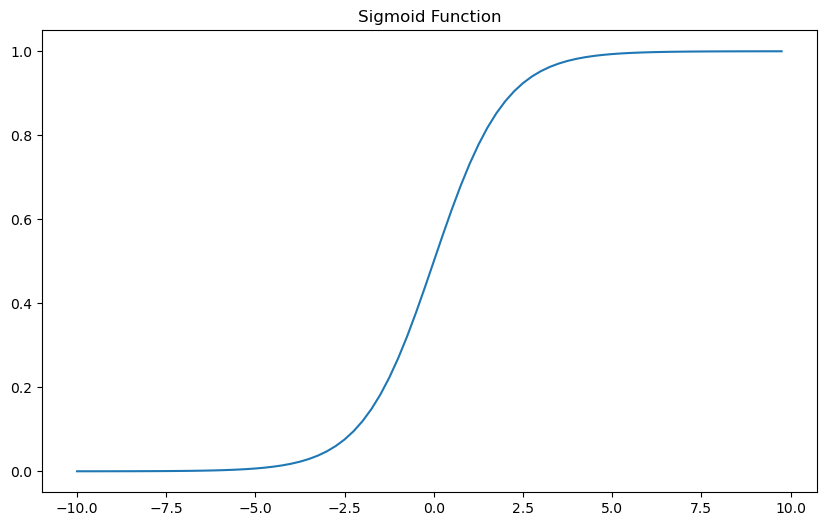

In [2]:
# Define sigmoid function
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

# Plot the curve and check the sigmoid function
domain = np.arange(-10, 10, .25)
plt.figure(figsize=(10, 6))
plt.plot(domain, sigmoid(domain))
plt.title("Sigmoid Function")

### Cross entropy loss (CEL) function

In [3]:
def cross_entropy_loss(y, y_hat):
    return -y*np.log(y_hat) - (1.0-y)*np.log(1.0-y_hat)

In [4]:
def cross_entropy_gradient(y, y_hat, x, with_bias = True):
    if with_bias == True:
        dw = (y_hat - y)*x
        db = (y_hat - y)
        return dw, db 
    else:
        dw = (y_hat - y)*x
        return dw

* Feed forward function: to feed the sigmoid function

In [5]:
def feed_forward(x, w, b, with_bias = True):
    if with_bias == True:
        return sigmoid(w @ x + b)
    else:
        return sigmoid(w @ x)

* Prediction function:

In [6]:
def make_prediction(x, w, b):
    y_hat = feed_forward(x, w, b)
    labels = np.array([1, 0])
    return np.random.choice(labels, p = [y_hat, 1.0-y_hat])

#### Implement on the dataset

In [8]:
# Load Pima Indians Diabetes Dataset
data = pd.read_csv('Data/pima-indians-diabetes.txt', sep=",", header=None)

# Set the names for columns
data.columns = ["Pregnant", "Glucose", "BP", "Triceps", "Insulin", "BMI", "Pedigree", "Age", "Diabetes"]

### Explore the dataset!

In [9]:
data.head()

,Pregnant,Glucose,BP,Triceps,Insulin,BMI,Pedigree,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data.shape

(768, 9)

Data distribution scatter plot

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

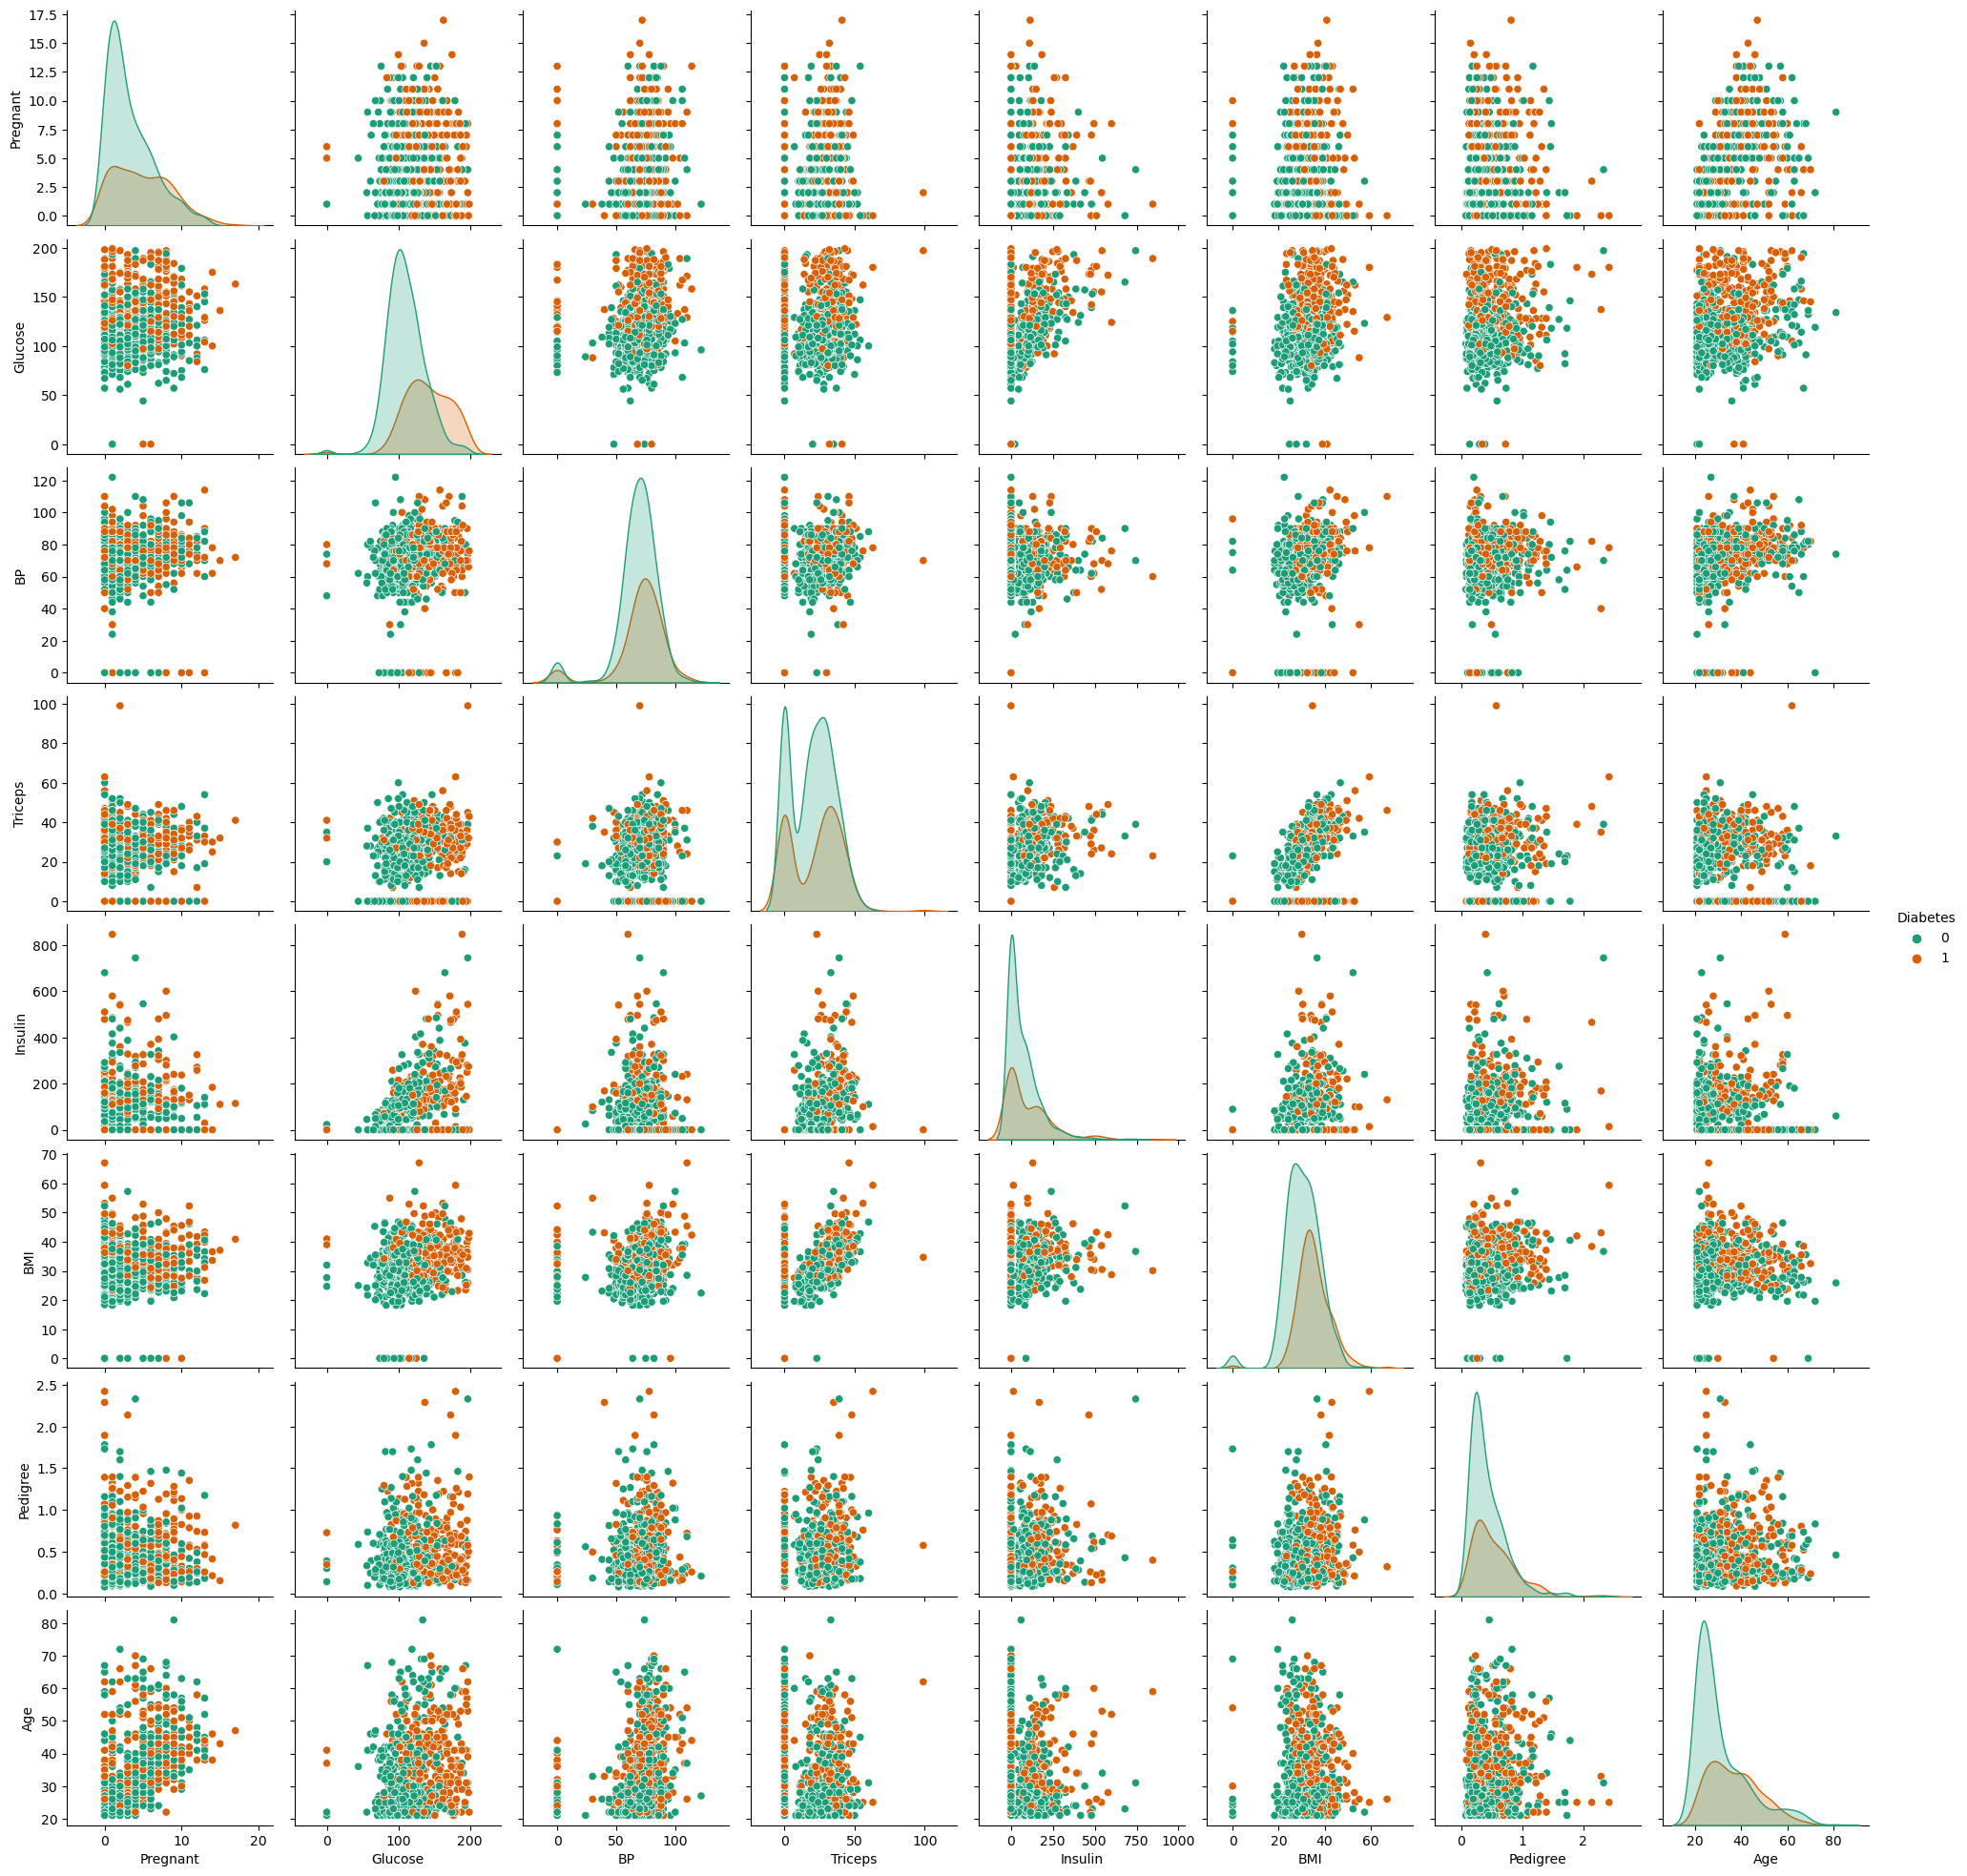

In [13]:
sns.pairplot(data, hue='Diabetes',palette='Dark2')

A preliminary examination indicates that the variables "Glucose" and "BMI" distinguish between diabetic and non-diabetic classes more effectively than other variables. Therefore, "Glucose" and "BMI" could be used to predict an individual's likelihood of developing diabetes.

Drop the values equal to 0.0 for both "Glucose" and "BMI".

In [14]:
# Drop the 0s in the both 'Glucose' and 'BMI'
data = data.loc[(dat[['Glucose', 'BMI']] != 0).all(axis=1)]

In [15]:
data.shape

(752, 9)

In [16]:
# Extract out desired features from candidates dataset, and covert features to numpy array
X = data[["Glucose", "BMI"]].to_numpy()

# Extract out labels, and convert labels to numpy array
Y = data["Diabetes"].to_numpy()

Text(0.5, 1.0, 'Plasma glucose concentration vs. BMI')

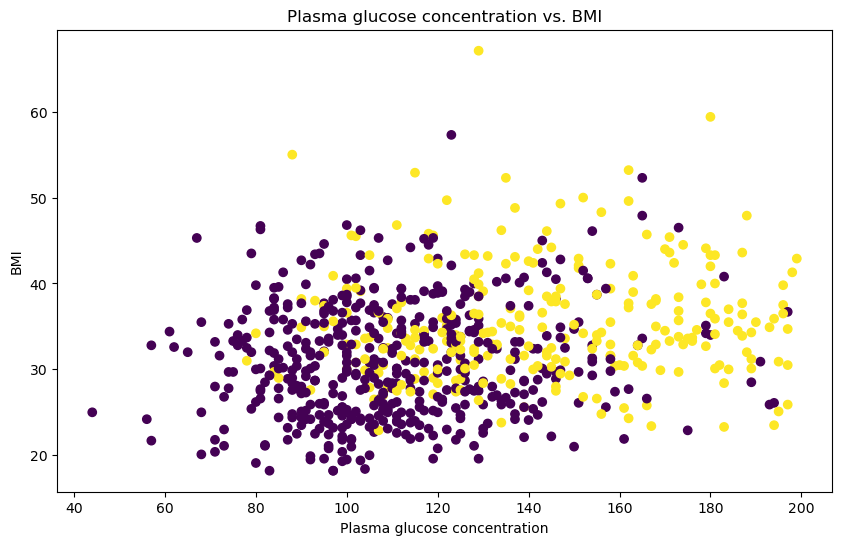

In [17]:
# Plot the scatter plot, to have a cursory view of the data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.xlabel("Plasma glucose concentration")
plt.ylabel("BMI")
plt.title("Plasma glucose concentration vs. BMI")

Adjust both variables to the same scale. This notebook employs unit length and min-max normalization techniques to scale the variables and assess the outcomes.

#### Scaling to unit length 

The general formula for Scaling to unit length's 
$$x'=\frac{x}{||x||}$$ 
where $x$ is the original value and $x'$ is the normalized value. This means dividing each value by the Euclidean length of the vector.

In [18]:
# Use scaling to unit length to normalize the variables
X[:, 0] = X[:, 0]/np.linalg.norm(X[:, 0])
X[:, 1] = X[:, 1]/np.linalg.norm(X[:, 1])

Text(0.5, 1.0, 'Plasma glucose concentration vs. BMI after Scaling to Unit Length')

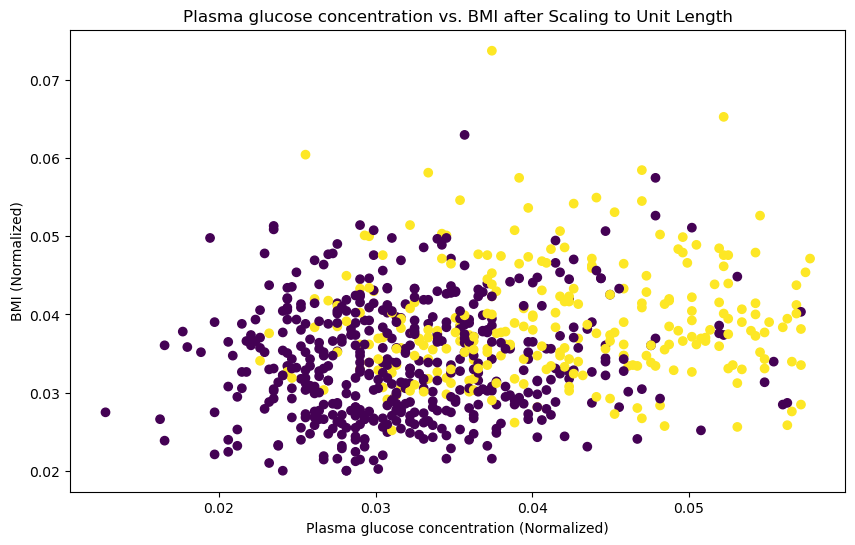

In [19]:
# Plot the scatter plot after scaling to unit length
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.xlabel("Plasma glucose concentration (Normalized)")
plt.ylabel("BMI (Normalized)")
plt.title("Plasma glucose concentration vs. BMI after Scaling to Unit Length")

Text(0, 0.5, 'Diabetes or not')

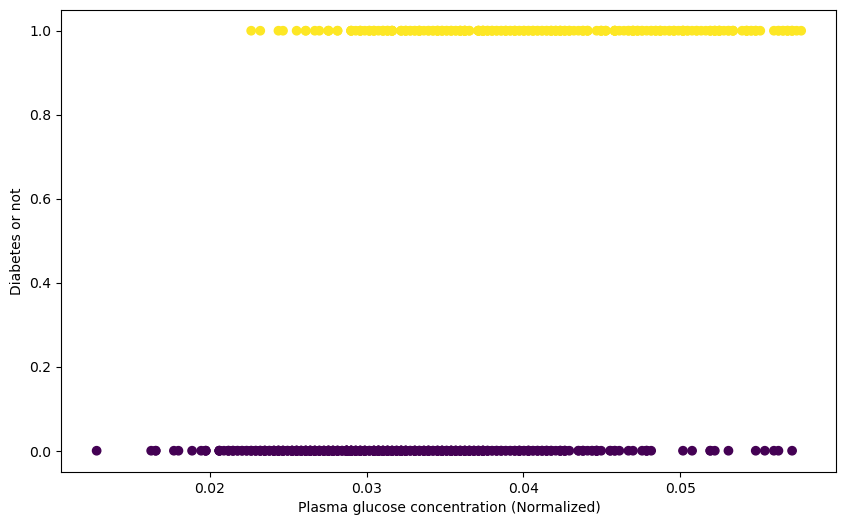

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], Y, c = Y)
plt.xlabel("Plasma glucose concentration (Normalized)")
plt.ylabel("Diabetes or not")

Text(0, 0.5, 'Diabetes or not')

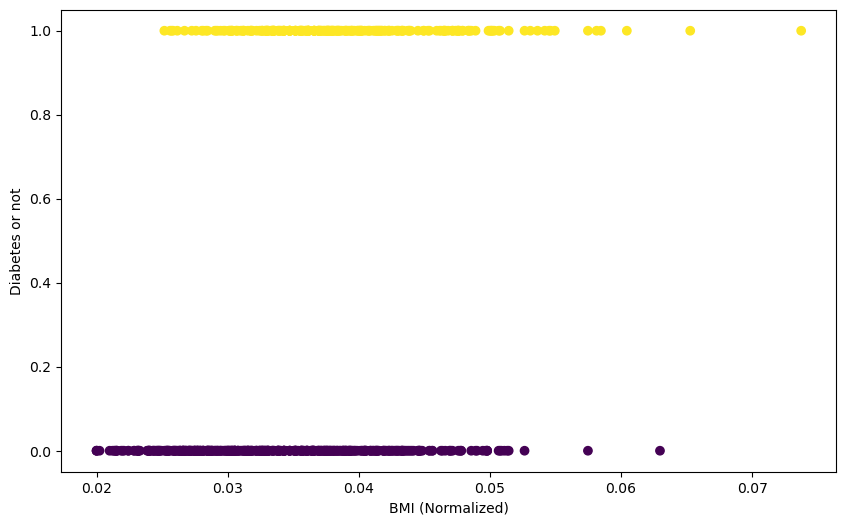

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], Y, c = Y)
plt.xlabel("BMI (Normalized)")
plt.ylabel("Diabetes or not")

Use Stochastic Gradient Descent. Use trial and error approach to set the learning rate, and iterate for 10000 times.

In [22]:
# Randomly initial w and b
w = np.random.randn(2)
b = np.random.randn()

# Set up the learning rate
alpha = 5

# Implement Stochastic Gradient Descent 
for j in range(10_000):
    i = np.random.randint(len(Y))
    x = X[i, :]
    y = Y[i]
    temp_dw = []
    temp_db = []
    for x, y in zip(X, Y):
        y_hat = feed_forward(x, w, b)
        dw, db = cross_entropy_gradient(y, y_hat, x)
        #w -= alpha*dw
        #b -= alpha*db
        temp_dw.append(dw)
        temp_db.append(db)
        
    dw = sum(temp_dw)/len(temp_dw)
    db = sum(temp_db)/len(temp_db)
    w -= alpha*dw
    b -= alpha*db
    
    total_loss = sum(cross_entropy_loss(Y[i], feed_forward(x, w, b))
                    for i, x in enumerate(X))
    
    # Print the total loss over every 1000 iterations
    if j % 1_000 == 0:
        print(f"Total Loss at time {j+1} = {total_loss}")

Total Loss at time 1 = 533.7857448754902
Total Loss at time 1001 = 468.9655424627665
Total Loss at time 2001 = 453.08614504386395
Total Loss at time 3001 = 440.06091497616353
Total Loss at time 4001 = 429.3459435421624
Total Loss at time 5001 = 420.49530575812844
Total Loss at time 6001 = 413.14947988605695
Total Loss at time 7001 = 407.02125408512177
Total Loss at time 8001 = 401.882076830076
Total Loss at time 9001 = 397.55013197998636


The algorithm works well. The total loss gradually decreases.

And then we can use our algorithm to predict, compare with the true label, and calculate the accuracy of our prediction.

In [26]:
hits = 0
for x, y in zip(X, Y):
    
    # Predict using our algorithm
    y_hat = make_prediction(x, w, b)
    
    # compare the predicted outcome with the real label
    hits += int(y_hat == y)
    
    #print(f"Prediction: {y_hat}")
    #print(f"True label: {y}")
    #print()

# Calculate the accuracy and print it
print(f"Classification Percentage = {100* (hits/len(Y))}%")

Classification Percentage = 64.36170212765957%


The model has accuracy approximately 64%.  

To compare the performance try another method of normalization.

#### Min-max Normalization

The general formula for min-max normalization is 
$$x'=\frac{x-min(x)}{max(x)-min(x)}$$
where $x$ is the original value and $x'$ is the normalized value.

In [27]:
# Extract out required features from candidates dataset, and covert features to numpy array
X = data[["Glucose", "BMI"]].to_numpy()

# Extract out labels, and convert labels to numpy array
Y = data["Diabetes"].to_numpy()

In [28]:
# Use min-max normalization to normalize the predictors
X[:, 0] = (X[:, 0] - np.min(X[:, 0]))/(np.max(X[:, 0] - np.min(X[:, 0])))
X[:, 1] = (X[:, 1] - np.min(X[:, 1]))/(np.max(X[:, 1] - np.min(X[:, 1])))

Text(0.5, 1.0, 'Plasma glucose concentration vs. BMI after Min-Max Normalization')

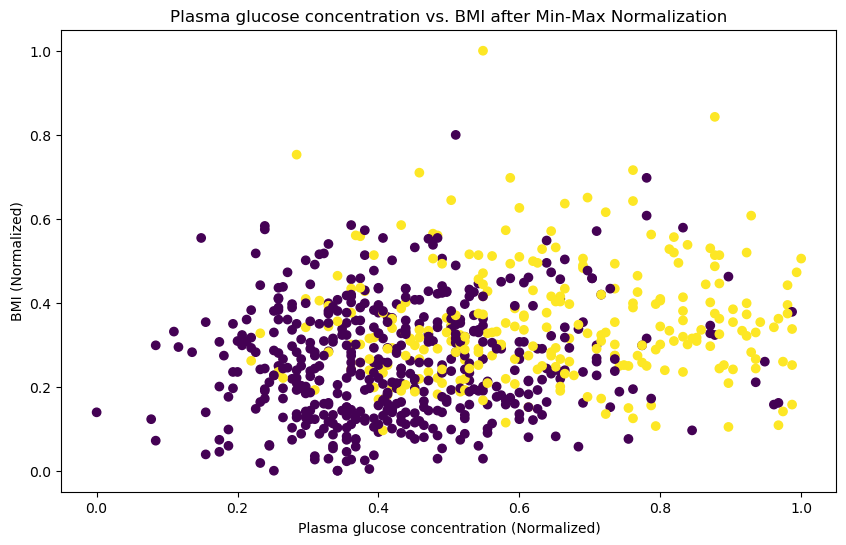

In [29]:
# Plot the scatterplot after min-max normalization
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.xlabel("Plasma glucose concentration (Normalized)")
plt.ylabel("BMI (Normalized)")
plt.title("Plasma glucose concentration vs. BMI after Min-Max Normalization")

After scaling to unit length, both variables are in the same scale in $[0,1]$.

Text(0, 0.5, 'Diabetes or not')

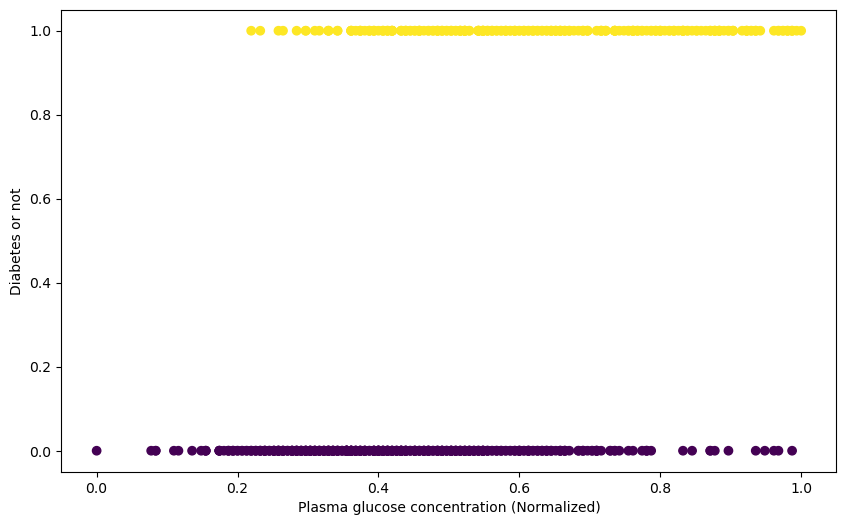

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], Y, c = Y)
plt.xlabel("Plasma glucose concentration (Normalized)")
plt.ylabel("Diabetes or not")

Text(0, 0.5, 'Diabetes or not')

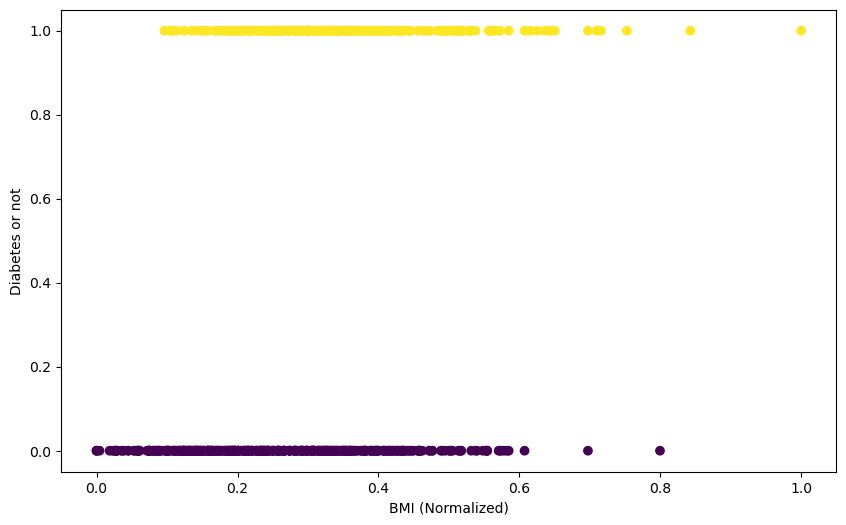

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], Y, c = Y)
plt.xlabel("BMI (Normalized)")
plt.ylabel("Diabetes or not")

Similarly, implement Stochastic Gradient Descent. Again, use trial and error approach to find the learning rate and iterate for 10000 times.

In [32]:
# Randomly initial w and b
w = np.random.randn(2)
b = np.random.randn()

# Set up the learning rate
alpha = 0.5

# Implement Stochastic Gradient Descent 
for j in range(10_000):
    i = np.random.randint(len(Y))
    x = X[i, :]
    y = Y[i]
    temp_dw = []
    temp_db = []
    for x, y in zip(X, Y):
        y_hat = feed_forward(x, w, b)
        dw, db = cross_entropy_gradient(y, y_hat, x)
        #w -= alpha*dw
        #b -= alpha*db
        temp_dw.append(dw)
        temp_db.append(db)
        
    dw = sum(temp_dw)/len(temp_dw)
    db = sum(temp_db)/len(temp_db)
    w -= alpha*dw
    b -= alpha*db
    
    total_loss = sum(cross_entropy_loss(Y[i], feed_forward(x, w, b))
                    for i, x in enumerate(X))
    # Print the total loss every 1000 iterations
    if j % 1_000 == 0:
        print(f"Total Loss at time {j+1} = {total_loss}")

Total Loss at time 1 = 566.5916831948826
Total Loss at time 1001 = 371.6529137540625
Total Loss at time 2001 = 369.4148582325266
Total Loss at time 3001 = 369.2699158595086
Total Loss at time 4001 = 369.2579506118275
Total Loss at time 5001 = 369.2569060310451
Total Loss at time 6001 = 369.256813523518
Total Loss at time 7001 = 369.25680529933146
Total Loss at time 8001 = 369.2568045673862
Total Loss at time 9001 = 369.2568045022243


The algorithm performs better than unit length approach. It converges rapidly.

To check prediction accuracy compare the predicted outcomes with the actual outcomes.

In [33]:
hits = 0
for x, y in zip(X, Y):
    
    # Predict using our algorithm
    y_hat = make_prediction(x, w, b)
    
    # compare whether the prediction is the same as the real label
    hits += int(y_hat == y)
    
    #print(f"Prediction: {y_hat}")
    #print(f"True label: {y}")
    #print()

# Calculate the accuracy and print it
print(f"Classification Percentage = {100* (hits/len(Y))}%")

Classification Percentage = 70.87765957446808%


The accuracy is 70%, improvement over the scaling to unit length method.

#### Conclusion

Performance of the algorithm varies depending on the scaling techniques used.